Two-Proportion Z-Test:
Z-statistic = 1.237, p-value = 0.216



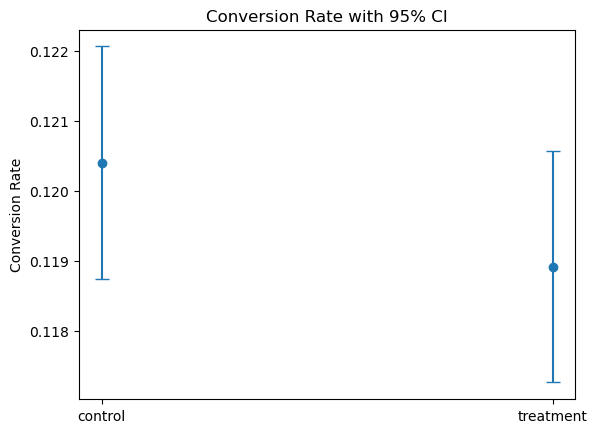

Chi-Square Test:
Chi2 = 1.857, p-value = 0.173, dof = 1

No 'time_on_page' column found for T-Test example.


In [3]:
# ----------------------------------------------------
# A/B Testing Statistical Analysis
# ----------------------------------------------------

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.proportion import proportions_ztest, proportion_confint
from scipy.stats import chi2_contingency, ttest_ind

# Load dataset
file_path = r"C:\Users\supar\OneDrive\Documents\ab_data.csv.xlsx"
df = pd.read_excel(file_path)

# -----------------------------------------
# 1. TWO-PROPORTION Z-TEST
# -----------------------------------------
# Example: Test if conversion rates differ between treatment and control groups
conversion_counts = df.groupby('group')['converted'].sum()
sample_sizes = df.groupby('group')['converted'].count()

z_stat, p_val = proportions_ztest(count=conversion_counts, nobs=sample_sizes)
print("Two-Proportion Z-Test:")
print(f"Z-statistic = {z_stat:.3f}, p-value = {p_val:.3f}\n")

# -----------------------------------------
# 2. CONFIDENCE INTERVAL VISUALIZATION
# -----------------------------------------
conf_ints = {}
for group in df['group'].unique():
    count = conversion_counts[group]
    nobs = sample_sizes[group]
    ci_low, ci_upp = proportion_confint(count, nobs, method='normal')
    conf_ints[group] = (count/nobs, ci_low, ci_upp)

# Convert to DataFrame for plotting
ci_df = pd.DataFrame(conf_ints, index=["Rate", "CI_Low", "CI_Upper"]).T.reset_index()
ci_df.rename(columns={'index': 'Group'}, inplace=True)

plt.errorbar(ci_df["Group"], ci_df["Rate"], 
             yerr=[ci_df["Rate"]-ci_df["CI_Low"], ci_df["CI_Upper"]-ci_df["Rate"]],
             fmt='o', capsize=5)
plt.title("Conversion Rate with 95% CI")
plt.ylabel("Conversion Rate")
plt.show()

# -----------------------------------------
# 3. CHI-SQUARE TEST (Categorical Relationships)
# -----------------------------------------
# Example: Test if conversion is independent of landing page
contingency_table = pd.crosstab(df['landing_page'], df['converted'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print("Chi-Square Test:")
print(f"Chi2 = {chi2:.3f}, p-value = {p:.3f}, dof = {dof}\n")

# -----------------------------------------
# 4. T-TEST (Continuous Metrics)
# -----------------------------------------
# Example: Suppose we have a numeric column like 'time_on_page'
if 'time_on_page' in df.columns:
    control_time = df[df['group'] == 'control']['time_on_page'].dropna()
    treatment_time = df[df['group'] == 'treatment']['time_on_page'].dropna()

    t_stat, p_val = ttest_ind(control_time, treatment_time, equal_var=False)
    print("T-Test for Continuous Metric (time_on_page):")
    print(f"T-statistic = {t_stat:.3f}, p-value = {p_val:.3f}\n")
else:
    print("No 'time_on_page' column found for T-Test example.")
